# 10. AdaBoost

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import AdaBoostClassifier
from collections import Counter

In [2]:
data_url = r'https://raw.githubusercontent.com/GonieAhn/Data-Science-online-course-from-gonie/main/Data%20Store/example_data.csv'

In [3]:
data_df = pd.read_csv(data_url)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   censor   532 non-null    int64  
 1   event    532 non-null    int64  
 2   age      532 non-null    int64  
 3   wtkg     532 non-null    float64
 4   hemo     532 non-null    int64  
 5   homo     532 non-null    int64  
 6   drugs    532 non-null    int64  
 7   karnof   532 non-null    int64  
 8   oprior   532 non-null    int64  
 9   z30      532 non-null    int64  
 10  zprior   532 non-null    int64  
 11  preanti  532 non-null    int64  
 12  race     532 non-null    int64  
 13  gender   532 non-null    int64  
 14  str2     532 non-null    int64  
 15  strat    532 non-null    int64  
 16  symptom  532 non-null    int64  
 17  cd40     532 non-null    int64  
 18  cd420    532 non-null    int64  
 19  cd496    532 non-null    int64  
 20  r        532 non-null    int64  
 21  cd80     532 non

In [4]:
data_df.describe()

,censor,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,0.340226,801.236842,35.225564,76.061855,0.078947,0.640977,0.118421,95.432331,0.030075,0.546992,...,0.812030,0.580827,1.981203,0.167293,353.204887,336.139098,173.146617,0.603383,987.250000,928.214286
std,0.474231,326.887929,8.852094,13.224698,0.269910,0.480165,0.323410,5.981856,0.170955,0.498255,...,0.391056,0.493888,0.905946,0.373589,114.105253,130.961573,191.455406,0.489656,475.223907,438.569798
min,0.000000,33.000000,13.000000,47.401000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,103.000000,49.000000,-1.000000,0.000000,221.000000,150.000000
25%,0.000000,535.750000,29.000000,67.500000,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,271.000000,243.750000,-1.000000,0.000000,653.250000,626.500000
50%,0.000000,933.500000,34.000000,74.600000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,1.000000,2.000000,0.000000,346.000000,330.500000,113.000000,1.000000,881.000000,818.000000
75%,1.000000,1081.000000,40.000000,83.502000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,1.000000,3.000000,0.000000,422.000000,418.000000,324.000000,1.000000,1190.000000,1164.000000
max,1.000000,1231.000000,70.000000,149.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,771.000000,909.000000,857.000000,1.000000,4255.000000,3130.000000


In [5]:
y = data_df['censor']
X = data_df.drop(columns=['censor'])

In [7]:
idx = list(range(X.shape[0]))
train_idx, valid_idx = train_test_split(idx, test_size=0.3, random_state=119)
print(f'train data : {len(train_idx)}')
print(f'valid data : {len(valid_idx)}')
print(f'train data y : {Counter(y.iloc[train_idx])}')
print(f'train data y : {Counter(y.iloc[valid_idx])}')

train data : 372
valid data : 160
train data y : Counter({0: 246, 1: 126})
train data y : Counter({0: 105, 1: 55})


[AdaBoost Parameters]
  - Package : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
  - n_estimators : # of Tree
  - learning_rate : learning_rate과 n_estimator와 Trade-off 관계가 있음
    - Weight applied to each classifier at each boosting iteration

In [15]:
estimators = [70, 90, 100]
learning = [0.01, 0.03, 0.05, 0.1, 0.5]

In [16]:
save_est = []
save_lr = []
f1_score_ = []

In [17]:
cnt = 0
for est in estimators:
    for lr in learning:
        print(f'----- {cnt} ----')
        cnt += 1
        print(f'estimator : {est}, lr : {lr}')

        model = AdaBoostClassifier(
            n_estimators=est,
            learning_rate=lr,
            random_state=119
        )
        model.fit(X.iloc[train_idx], y.iloc[train_idx])

        # train Acc
        y_pred_train = model.predict(X.iloc[train_idx])
        cm_train = confusion_matrix(y.iloc[train_idx], y_pred_train)
        print('train Confusion Matrix')
        print(cm_train)
        print(f'train Acc : {(cm_train[0,0] + cm_train[1,1]) / cm_train.sum()}')
        print(f'train f1-score : {f1_score(y.iloc[train_idx], y_pred_train)}')

        # test Acc
        y_pred_test = model.predict(X.iloc[valid_idx])
        cm_test = confusion_matrix(y.iloc[valid_idx], y_pred_test)
        print('test Confusion Matrix')
        print(cm_test)
        print(f'test Acc : {(cm_test[0,0] + cm_test[1,1]) / cm_test.sum()}')
        print(f'test f1-score : {f1_score(y.iloc[valid_idx], y_pred_test)}')
        print('-'*20)
        save_est.append(est)
        save_lr.append(lr)
        f1_score_.append(f1_score(y.iloc[valid_idx], y_pred_test))

----- 0 ----
estimator : 70, lr : 0.01
train Confusion Matrix
[[189  57]
 [  8 118]]
train Acc : 0.8252688172043011
train f1-score : 0.7840531561461794
test Confusion Matrix
[[80 25]
 [ 2 53]]
test Acc : 0.83125
test f1-score : 0.7969924812030076
--------------------
----- 1 ----
estimator : 70, lr : 0.03
train Confusion Matrix
[[194  52]
 [ 10 116]]
train Acc : 0.8333333333333334
train f1-score : 0.7891156462585033
test Confusion Matrix
[[84 21]
 [ 2 53]]
test Acc : 0.85625
test f1-score : 0.8217054263565892
--------------------
----- 2 ----
estimator : 70, lr : 0.05
train Confusion Matrix
[[220  26]
 [ 13 113]]
train Acc : 0.8951612903225806
train f1-score : 0.8528301886792453
test Confusion Matrix
[[93 12]
 [ 7 48]]
test Acc : 0.88125
test f1-score : 0.8347826086956521
--------------------
----- 3 ----
estimator : 70, lr : 0.1
train Confusion Matrix
[[225  21]
 [ 16 110]]
train Acc : 0.9005376344086021
train f1-score : 0.8560311284046692
test Confusion Matrix
[[90 15]
 [10 45]]
test

In [18]:
print(f'best idx : {np.argmax(f1_score_)}, f1-score : {f1_score_[np.argmax(f1_score_)]}')
print(f'best est : {save_est[np.argmax(f1_score_)]}, lr:{save_lr[np.argmax(f1_score_)]}, ')

best idx : 6, f1-score : 0.8548387096774193
best est : 90, lr:0.03, 


In [20]:
best_model = AdaBoostClassifier(
            n_estimators=90,
            learning_rate=0.03,
            random_state=119
        )
best_model.fit(X.iloc[train_idx], y.iloc[train_idx])
y_pred_test = best_model.predict(X.iloc[valid_idx])
cm_test = confusion_matrix(y.iloc[valid_idx], y_pred_test)
print('test Confusion Matrix')
print(cm_test)
print(f'test Acc : {(cm_test[0,0] + cm_test[1,1]) / cm_test.sum()}')
print(f'test f1-score : {f1_score(y.iloc[valid_idx], y_pred_test)}')

test Confusion Matrix
[[89 16]
 [ 2 53]]
test Acc : 0.8875
test f1-score : 0.8548387096774193


In [21]:
feature_map = pd.DataFrame(sorted(zip(best_model.feature_importances_, X.columns), reverse=True), columns=['Score', 'Feature'])
print(feature_map)

       Score  Feature
0   0.544444    event
1   0.188889    cd420
2   0.111111  preanti
3   0.088889        r
4   0.055556    cd496
5   0.011111     race
6   0.000000   zprior
7   0.000000      z30
8   0.000000     wtkg
9   0.000000  symptom
10  0.000000    strat
11  0.000000     str2
12  0.000000   oprior
13  0.000000   karnof
14  0.000000     homo
15  0.000000     hemo
16  0.000000   gender
17  0.000000    drugs
18  0.000000    cd820
19  0.000000     cd80
20  0.000000     cd40
21  0.000000      age


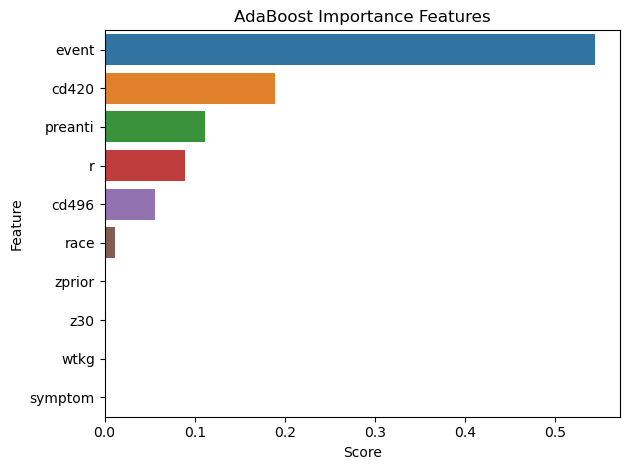

In [22]:
feature_map_20 = feature_map.iloc[:10]
sns.barplot(data=feature_map_20, x='Score', y='Feature')
plt.title('AdaBoost Importance Features')
plt.tight_layout()
plt.show()